# K means Clustering
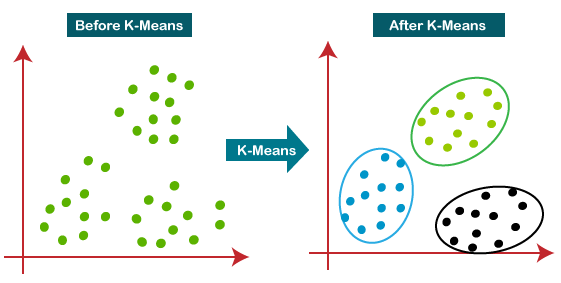

# Overview

K-means clustering is a machine learning algorithm used for clustering similar data points together. It is a popular technique for data exploration and recommendation.

The algorithm works by iteratively grouping data points into k clusters, where k is the desired number of clusters. Initially, k random points are selected as the centroids of the clusters. Then, each data point is assigned to the nearest centroid based on its distance using a specified distance metric, such as Euclidean distance. After all data points have been assigned to their nearest centroids, the centroids are recomputed as the mode of all data points assigned to that cluster. 

# Advantage
1. Simple and efficient in handling large datasets. 
2. Can reveal patterns that may not be immediately apparent. 

# Disadvantage
1. Assumes that the data can be partitioned into clusters that are roughly spherical and have similar variances. 
2. Does not guarantee the optimal number of clusters, which must be chosen by the user.

# Data
The Palmer penguins dataset is a collection of data on three different species of penguins, namely Adelie, Chinstrap, and Gentoo, collected on three islands in the Palmer Archipelago, Antarctica. The dataset contains various physical measurements of penguins, including culmen length, culmen depth, flipper length, and body mass, as well as information on the sex and age of each penguin.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In this analysis, we will explore the relationship between two key features of 2 categories of penguins, Adelie and Gentoo, as well as their bill length and bill depth, and how these features can be used to differentiate between penguins.  Before running the algorithm, we need to determine how many clusters we want to identify. We notice that the data can be divided into 2 clusters which means k = 2.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

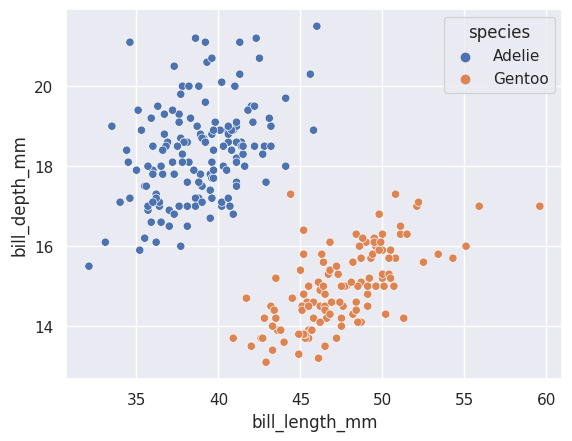

In [2]:
sns.set_theme() 
np.random.seed(41)
df = pd.read_csv("palmer_penguins.csv")
df = df.dropna()

# Choose 2 species Adelie and Gentoo
df = df[df["species"].isin(["Adelie", "Gentoo"])]
# Visualize chosen data
sns.scatterplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species")


Next, we randomly initialize k cluster centroids to serve as the initial centroids for each cluster.

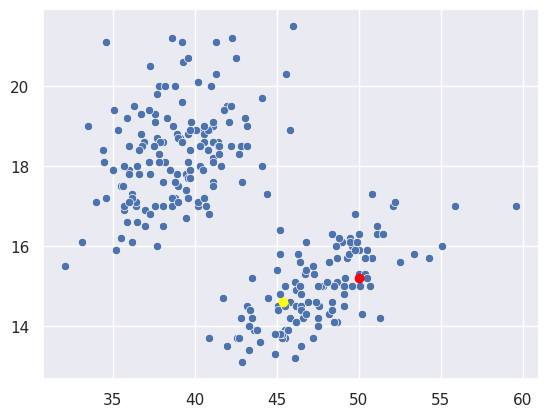

In [3]:
X = df[["bill_length_mm", "bill_depth_mm"]].to_numpy()

# First choose 2 random points
def initialize_centers(X, k = 2):
    centers = []
    random_init = np.random.choice(X.shape[0], size=k, replace=False)
    for i in random_init:
        centers.append(X[i])
    return centers

initial_centers = initialize_centers(X, k = 2)
# Visuailize intial centers
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.scatter(initial_centers[0][0], initial_centers[0][1], color="yellow")
plt.scatter(initial_centers[1][0], initial_centers[1][1], color="red")


Then, we assign each data point to the nearest centroid. For each data point, calculate the Euclidean distance between it and each centroid. Assign the data point to the cluster represented by the nearest centroid.

<Axes: >

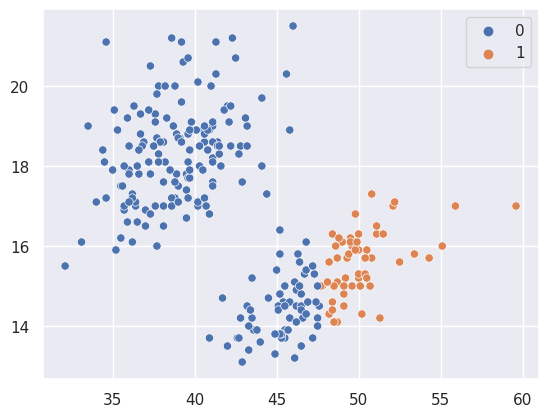

In [4]:
# Method to calculate distance in 2d data
def distance(p, q):
    return np.sqrt(np.sum((p - q)**2))
distance(initial_centers[0], initial_centers[1])

# Assign cluster based on distance nearest to centers
def assign_clusters(X, centers):
    cluster_assignments = []
    for i in range(X.shape[0]):
        for center in centers:
            distances = [distance(X[i], center) for center in centers]
        assigned_cluster = np.argmin(distances)
        cluster_assignments.append(assigned_cluster)
    return cluster_assignments

cluster_assignments = assign_clusters(X, initial_centers)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=cluster_assignments)

We then update each centroid by recalculating the centroid of each cluster by taking the mean of all the data points assigned to it.

<Axes: >

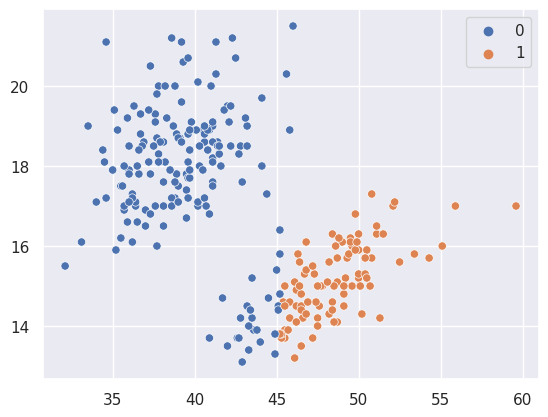

In [5]:
def update_centers(X, cluster_assignments, k = 2):
    new_centers = []
    for cluster in range(k):
        cluster_points = []
        for i in range(X.shape[0]):
            if cluster_assignments[i] == cluster:
                cluster_points.append(X[i])
        cluster_points = np.array(cluster_points)
        new_center = np.mean(cluster_points, axis=0)
        new_centers.append(new_center)
    return new_centers
new_centers = update_centers(X, cluster_assignments, k = 2)
new_cluster_assignments = assign_clusters(X, new_centers)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=new_cluster_assignments)


Our plot does not change much, now we implent k means clustering where we reassign each data point to its nearest centroid and recalculate the centroids. We repeat these steps until the centroids no longer move significantly or a maximum number of iterations is reached. We also add the function within-cluster sum of squares (WCSS) which can identify the "elbow point" where adding more clusters doesn't improve the clustering significantly.

<Axes: >

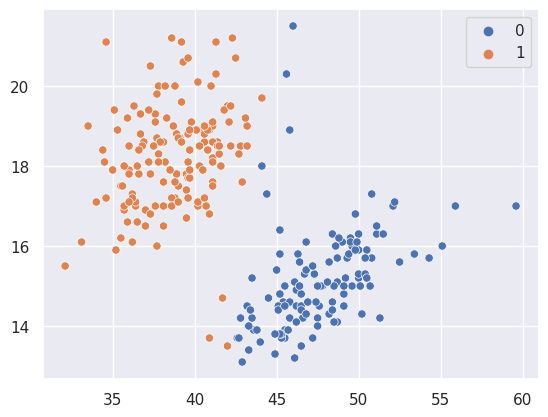

In [6]:
class k_means_clustering(object):
    def __init__(self, epoch = 100, k = 2):
        self.k = k
        self.epoch = epoch
    
    def train(self, X):
        centers = initialize_centers(X, k = self.k)
        for epo in range(self.epoch):
            cluster_assignments = assign_clusters(X, centers)
            centers = update_centers(X, cluster_assignments, k = self.k)
        self.cluster_assignments = cluster_assignments
        self.centers = centers
    
    def predict(self, X):
        return self.cluster_assignments
    
    def wcss(self, X):
        wcss = 0
        for i in range(self.k):
            cluster_points = []
            for j in range(X.shape[0]):
                if self.cluster_assignments[j] == i:
                    cluster_points.append(X[j])
            cluster_wcss = ((cluster_points - self.centers[i])**2).sum()
            wcss = wcss + cluster_wcss
        return wcss
    
kmc = k_means_clustering(k = 2)
kmc.train(X)
final_cluster_assignments = kmc.predict(X)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=final_cluster_assignments)

While our clustering is not perfect, it looks much better with some few outliers. While we know k = 2, there are cases where k is unknown due to unlabeld data. We use Elbow plot to find otpimal k which require us to plot WCSS against the number of clusters and identifying the "elbow point" where adding more clusters doesn't improve the clustering significantly.


[Text(0.5, 1.0, 'Elbow plot of WCSS over k clusters'),
 Text(0.5, 0, 'Number of k clusters'),
 Text(0, 0.5, 'WCSS')]

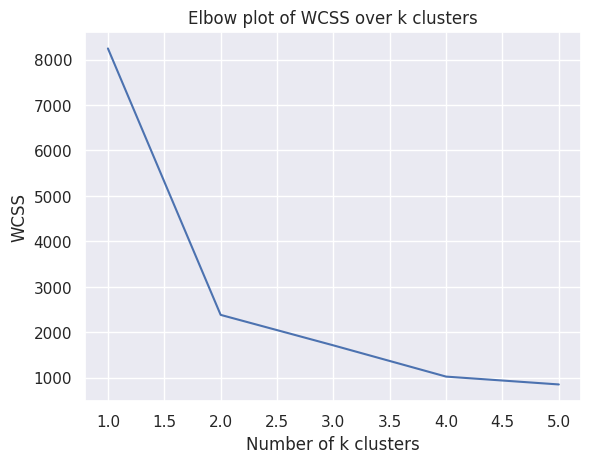

In [7]:
possible_K = [k for k in range(1, 6, 1)]
wcss_ = []
for ki in possible_K:
    kmc = k_means_clustering(k = ki)
    kmc.train(X)
    wcss = kmc.wcss(X)
    wcss_.append(wcss)

sns.lineplot(x=possible_K, y=wcss_).set(title='Elbow plot of WCSS over k clusters', 
                                         xlabel='Number of k clusters', 
                                         ylabel='WCSS')

# Conclusion
As expected, k = 2 is the optimal value. Choosing the correct k value is crucial in ensuring the clusters are meaningful and useful for downstream analysis. If the k value is too small, the algorithm will group dissimilar data points together, and if the k value is too large, the algorithm may start creating smaller clusters, which can lead to overfitting and making the results difficult to interpret. Additionally, having too many clusters can make it harder to identify the patterns in the data and may lead to noise.